In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
# Funcao para buscar dados da API CoinGecko
def get_crypto_data(crypto_id, vs_currency='usd', days='365'):
    url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart'
    params = {
        'vs_currency': vs_currency,
        'days': days,
        'interval': 'daily'
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    # Organizando os dados de preço e volume em um DataFrame
    df = pd.DataFrame({
        'date': pd.to_datetime([pd.Timestamp(ts, unit='ms') for ts in np.array(data['prices'])[:, 0]]),
        'price': np.array(data['prices'])[:, 1],
        'volume': np.array(data['total_volumes'])[:, 1],
        'market_cap': np.array(data['market_caps'])[:, 1]
    })
    df.set_index('date', inplace=True)

        # Verificando se a resposta e' valida
    if response.status_code != 200:
        raise Exception("Erro ao buscar dados da API")
    
    data = response.json()

    # Garantir que as chaves 'prices', 'total_volumes' e 'market_caps' existam
    if 'prices' not in data or 'total_volumes' not in data or 'market_caps' not in data:
        raise KeyError("Os dados retornados pela API estão incompletos ou não possuem as chaves necessárias.")
    
    return df

In [3]:
rndr_df = get_crypto_data('render-token')

In [4]:
rndr_df.head()

,price,volume,market_cap
date,,,
2023-09-25,1.549265,1.061950e+07,5.760066e+08
2023-09-26,1.483968,1.868308e+07,5.522696e+08
2023-09-27,1.487141,1.467708e+07,5.530340e+08
2023-09-28,1.482334,1.341522e+07,5.516365e+08
2023-09-29,1.521303,1.500150e+07,5.668259e+08


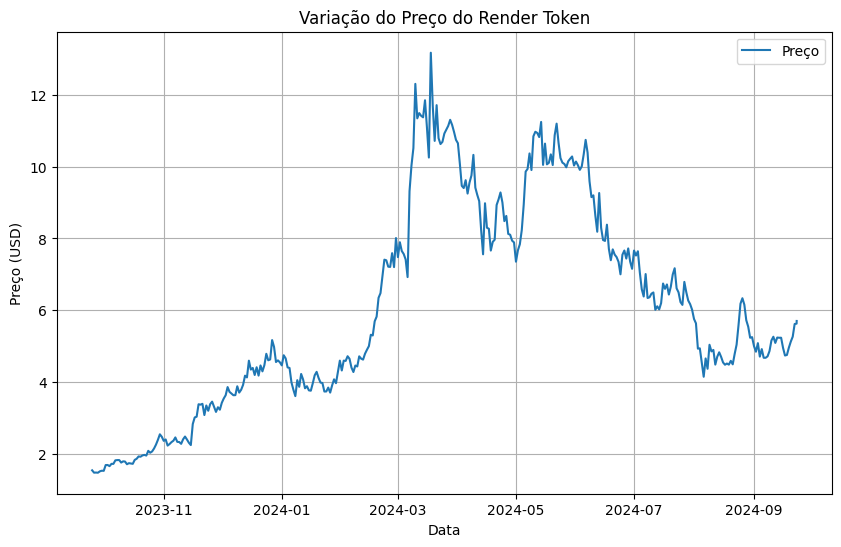

In [5]:
# Plotando os precos ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(rndr_df.index, rndr_df['price'], label='Preço')
plt.title('Variação do Preço do Render Token')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.grid(True)
plt.legend()
plt.show()

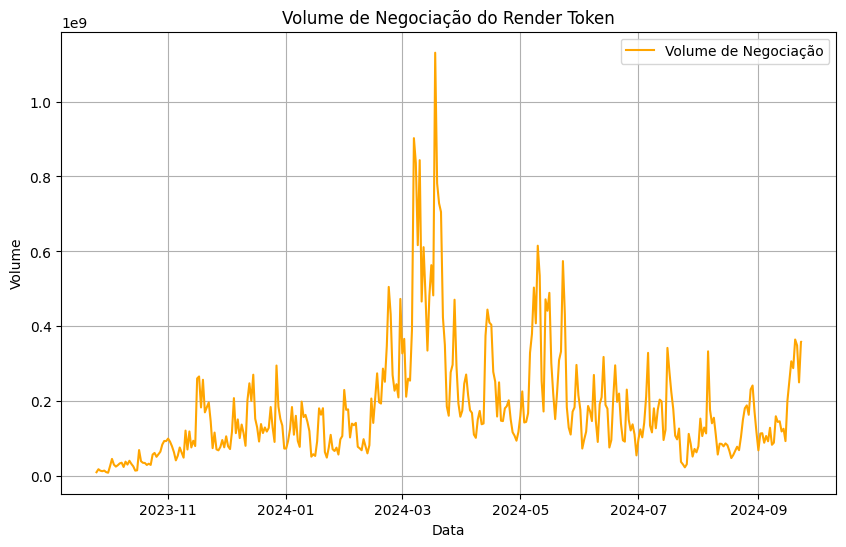

In [6]:
# Plotando o volume de negociacao ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(rndr_df.index, rndr_df['volume'], color='orange', label='Volume de Negociação')
plt.title('Volume de Negociação do Render Token')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
rndr_df.to_csv('../backend/RNDR_historical_data.csv')
rndr_df.to_csv('RNDR_historical_data.csv')